In [1]:
%matplotlib inline

import pandas as pd
import time
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
from IPython.display import display

# if csv isn't there:
# %run ./CreateCSVFile.py
gtd = pd.read_csv('gtd_processed_5features.csv', encoding='latin1', low_memory=False)
gtd = gtd.tail(10000) #TODO: only in to speed up for now
display(gtd.head(5))
gtd.shape

,groupId,iyear,country,attacktype1,weaptype1
78657,939,2015,4,3,6
78658,214,2015,147,2,5
78659,384,2015,153,3,6
78660,506,2015,4,6,13
78661,707,2015,155,8,10


(10000, 5)

Split-out validation dataset

In [3]:
array = gtd.values
seed = 188
X = array[:,1:]
Y = array[:,0]
# print X
validation_size = 0.20 #TODO: lower for final
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC())) #Too slow for this many samples - O(N^3)
  
results = []
names = []
scoring = 'accuracy'
 
#%timeit
for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=10, random_state=seed) #ensure same seed so models are directly comparable
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f%% (%f) - %s seconds" % (name, cv_results.mean(), cv_results.std(), round((time.time() - start_time),3))
    print(msg)

LR: 0.350250% (0.016675) - 57.74 seconds
LDA: 0.425000% (0.011429) - 0.319 seconds
KNN: 0.729375% (0.014930) - 0.279 seconds
CART: 0.758375% (0.015115) - 0.141 seconds
GNB: 0.155250% (0.015060) - 0.598 seconds
SVM: 0.754875% (0.018578) - 69.904 seconds


Compare Algorithms

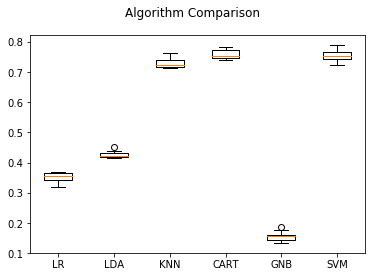

In [8]:
fig = plt.figure()
# ?plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Make predictions on validation dataset

In [11]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.734
[[ 0  0  0 ...,  0  0  0]
 [ 0 11  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  2]]
             precision    recall  f1-score   support

         12       0.00      0.00      0.00         3
         18       0.24      0.55      0.33        20
         20       0.00      0.00      0.00         1
         22       0.00      0.00      0.00         1
         25       0.50      0.09      0.15        11
         35       0.00      0.00      0.00         4
         37       0.00      0.00      0.00         1
         39       0.00      0.00      0.00         2
         48       0.00      0.00      0.00         1
         53       0.29      0.11      0.15        19
         58       0.35      0.25      0.29        24
         59       0.00      0.00      0.00         2
         60       0.50      0.40      0.44         5
         62       1.00      1.00      1.00       134
         64       0.00      0.00  